# assignment 2

Første del er omkring gennemsnitligt forbrug for forskellige indkomstgrupper / indtægtsgrupper 
Tænker at anden del så kan være om forbrugerprisindekset - altså købekraftspariteten, og så kan man sammenligne på den måde, om forbruget i de forskellige grupper har været ramt 


In [1]:
#loader de forskellige pakker
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

#og loader The DST API wrapper 
# installeret %pip install git+https://github.com/alemartinello/dstapi

#og nu downloades a package 'a wrapper for multiple APIs' with a pandas interface
# installeret %pip install pandas-datareader

import datetime #gør at vi kan håndterer datoer 
import pandas_datareader
from dstapi import DstApi

#importer mulighed for at lave venn diagrammer
#%pip install matplotlib-venn
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import plotly.graph_objects as go


Importerer data direkte fra Danmarks Statistik, tabel FU04, der vedrører husholdningernes forbrug, opdelt efter "hvilken klasse" de arbejder i, eller ikke arbejder i

In [2]:
#importer data fra DST
ind = DstApi('FU04') 
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table FU04: Consumption by group of consumption, socioeconomic status, price unit and time
Last update: 2023-03-29T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,KONSUMGRP,47,1000,CONSUMPTION TOTAL,127000,12.7 Other services n.e.c.,False
1,SOCIO,9,2001,Average Households,3080,Other not economically active,False
2,PRISENHED,2,AARPRIS,Current prices,08PRIS,Real prices,False
3,Tid,28,1994,1994,2021,2021,True


Alt data og variable bliver printet, så man kan se DATA ID

In [3]:
# The available values for a each variable: 
for variable in tabsum['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable, language='en'))

KONSUMGRP:


,id,text
0,1000,CONSUMPTION TOTAL
1,011000,01.1 Food
2,012000,01.2 Non-alcoholic beverages
3,021000,02.1 Alcoholic beverages
4,022000,02.2 Tobacco
5,023000,02.3 Narcotics
6,031000,03.1 Clothing
7,032000,03.2 Footwear
8,041000,04.1 Actual rentals for housing
9,042000,04.2 Imputed rentals for housing


SOCIO:


,id,text
0,2001,Average Households
1,3010,Selfemployed
2,3020,Employees - upper level
3,3030,Employees - medium level
4,3040,Employees - basic level
5,3050,Unemployed
6,3060,Receiving education
7,3070,Pensioners and early retirement
8,3080,Other not economically active


PRISENHED:


,id,text
0,AARPRIS,Current prices
1,08PRIS,Real prices


Tid:


,id,text
0,1994,1994
1,1995,1995
2,1996,1996
3,1997,1997
4,1998,1998
5,1999,1999
6,2000,2000
7,2001,2001
8,2002,2002
9,2003,2003


In [4]:
# The _define_base_params -method gives us a nice template (selects all available data)
params = ind._define_base_params(language='en')
params
#below we will see * which means that it will select everything, We will try to cut down data 

{'table': 'fu04',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KONSUMGRP', 'values': ['*']},
  {'code': 'SOCIO', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

Nedenfor definerer jeg de værdier, som jeg vil beholde fra datasættet. Det er gjort med deres DATA ID, som man kan se ovenfor, hvor de alle bliver printet

In [5]:
params = {'table': 'fu04',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KONSUMGRP', 'values': ['1000', '011000', '022000', '041000', '061000', '125000']},
  {'code': 'SOCIO', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['08PRIS']},
  {'code': 'Tid', 'values': ['>2005<=2021']}]}

In [6]:
all_ind = ind.get_data(params=params)
all_ind.head(5)

,KONSUMGRP,SOCIO,PRISENHED,TID,INDHOLD
0,01.1 Food,Average Households,Real prices,2020,33774
1,01.1 Food,Selfemployed,Real prices,2020,39756
2,01.1 Food,Employees - upper level,Real prices,2020,44169
3,01.1 Food,Employees - medium level,Real prices,2020,44746
4,01.1 Food,Employees - basic level,Real prices,2020,34147


Sorterer

In [7]:
all_ind.sort_values(by=['SOCIO', 'TID', 'KONSUMGRP'], inplace=True)
all_ind.head(10)

,KONSUMGRP,SOCIO,PRISENHED,TID,INDHOLD
171,01.1 Food,Average Households,Real prices,2006,35692
180,02.2 Tobacco,Average Households,Real prices,2006,5745
189,04.1 Actual rentals for housing,Average Households,Real prices,2006,25494
198,"06.1 Medical products, appliances and equipment",Average Households,Real prices,2006,4757
207,12.5 Insurance,Average Households,Real prices,2006,17067
162,CONSUMPTION TOTAL,Average Households,Real prices,2006,344321
224,01.1 Food,Average Households,Real prices,2007,36277
233,02.2 Tobacco,Average Households,Real prices,2007,4917
242,04.1 Actual rentals for housing,Average Households,Real prices,2007,25457
251,"06.1 Medical products, appliances and equipment",Average Households,Real prices,2007,5329


Ændrer rækkefølgen på kolonnerne

In [8]:
all_ind_sort = all_ind.loc[:, ['SOCIO', 'TID', 'KONSUMGRP', 'INDHOLD']]
all_ind_sort.head()

,SOCIO,TID,KONSUMGRP,INDHOLD
171,Average Households,2006,01.1 Food,35692
180,Average Households,2006,02.2 Tobacco,5745
189,Average Households,2006,04.1 Actual rentals for housing,25494
198,Average Households,2006,"06.1 Medical products, appliances and equipment",4757
207,Average Households,2006,12.5 Insurance,17067


In [9]:
print(len(all_ind_sort.KONSUMGRP.str.contains('CONSUMPTION TOTAL')) == len(all_ind_sort))
print(all_ind_sort.KONSUMGRP.unique())


True
['01.1 Food' '02.2 Tobacco' '04.1 Actual rentals for housing'
 '06.1 Medical products, appliances and equipment' '12.5 Insurance'
 'CONSUMPTION TOTAL']


Fjerner de andre consumption groups, så der kun er totalt forbrug

In [10]:
Total_consumption1 = all_ind_sort.KONSUMGRP.str.contains('CONSUMPTION TOTAL') # df med true, false values
Total_consumption1_table = all_ind_sort.loc[Total_consumption1,['SOCIO', 'TID', 'KONSUMGRP', 'INDHOLD']]
Total_consumption1_table 

,SOCIO,TID,KONSUMGRP,INDHOLD
162,Average Households,2006,CONSUMPTION TOTAL,344321
269,Average Households,2007,CONSUMPTION TOTAL,350367
270,Average Households,2008,CONSUMPTION TOTAL,340824
324,Average Households,2009,CONSUMPTION TOTAL,316161
387,Average Households,2010,CONSUMPTION TOTAL,325968
...,...,...,...,...
822,Unemployed,2017,CONSUMPTION TOTAL,195272
95,Unemployed,2018,CONSUMPTION TOTAL,177620
149,Unemployed,2019,CONSUMPTION TOTAL,175521
41,Unemployed,2020,CONSUMPTION TOTAL,199903


ser hvilke grupper der er i datasættet

In [11]:
Total_consumption1.columns = ['SOCIO', 'TID', 'KONSUMGRP', 'INDHOLD'] #renaming af columns
print(Total_consumption1.columns)

['SOCIO', 'TID', 'KONSUMGRP', 'INDHOLD']


In [12]:
df = Total_consumption1_table.copy()

In [13]:
df.head()

,SOCIO,TID,KONSUMGRP,INDHOLD
162,Average Households,2006,CONSUMPTION TOTAL,344321
269,Average Households,2007,CONSUMPTION TOTAL,350367
270,Average Households,2008,CONSUMPTION TOTAL,340824
324,Average Households,2009,CONSUMPTION TOTAL,316161
387,Average Households,2010,CONSUMPTION TOTAL,325968


In [14]:
plt.plot(df, df, color)

NameError: name 'color' is not defined

In [15]:
def return_indhold_for_socio(df, socio):
    values = df[df["SOCIO"] == socio]["INDHOLD"].values
    
    return values


years = np.arange(2006, 2022)



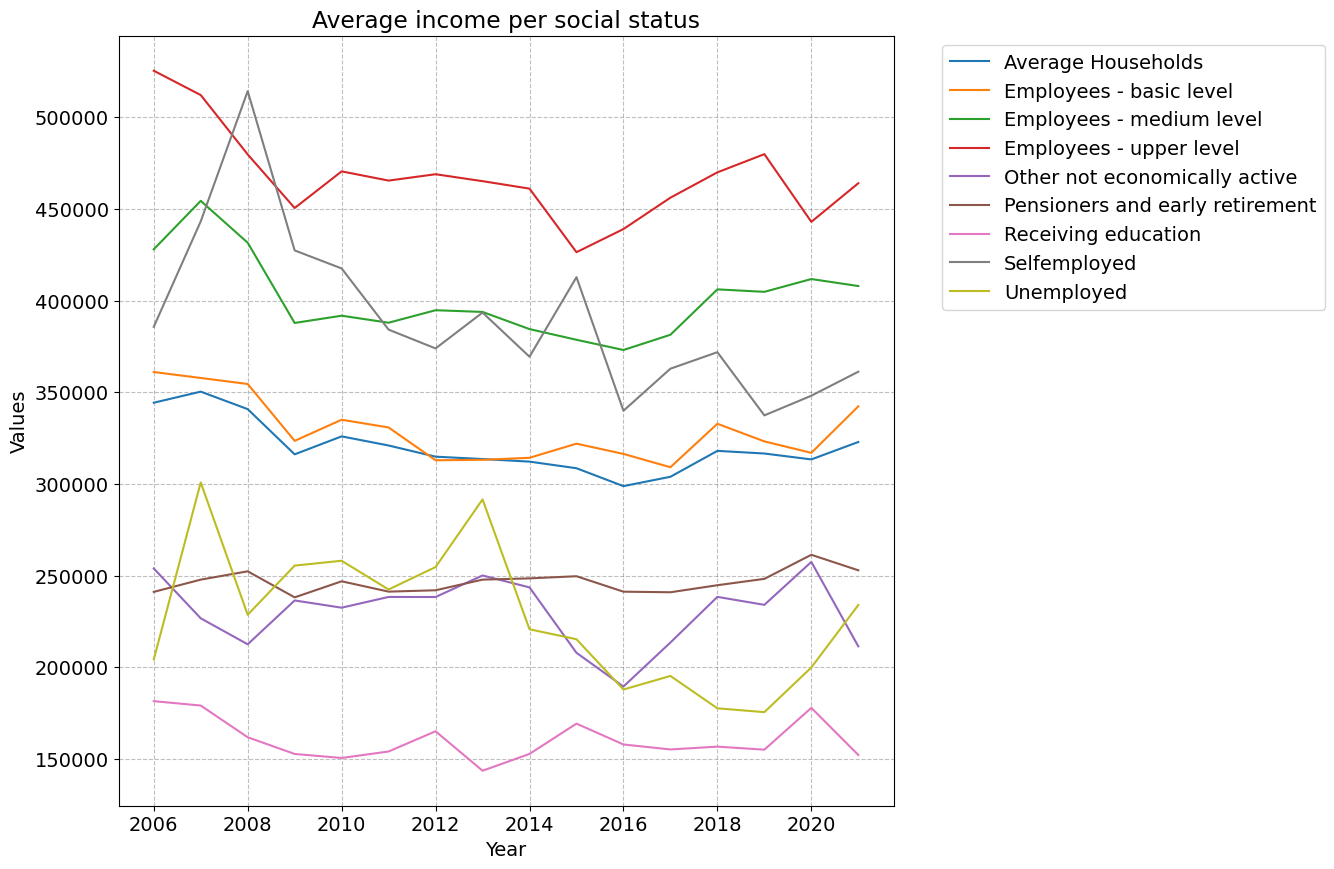

In [16]:
# Define the list of groups
groups = ['Average Households', 'Employees - basic level', 'Employees - medium level',
          'Employees - upper level', 'Other not economically active',
          'Pensioners and early retirement', 'Receiving education', 'Selfemployed',
          'Unemployed']

# Create a single plot with a line for each group
fig, ax = plt.subplots(figsize=(10,10))
for group in groups:
    values = return_indhold_for_socio(df, group)
    ax.plot(years, values, label=group)

# Add legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Year")
plt.ylabel("Values")


plt.title("Average income per social status")
# Show the plot
plt.show()




Text(0.5, 1.0, 'Average household income')

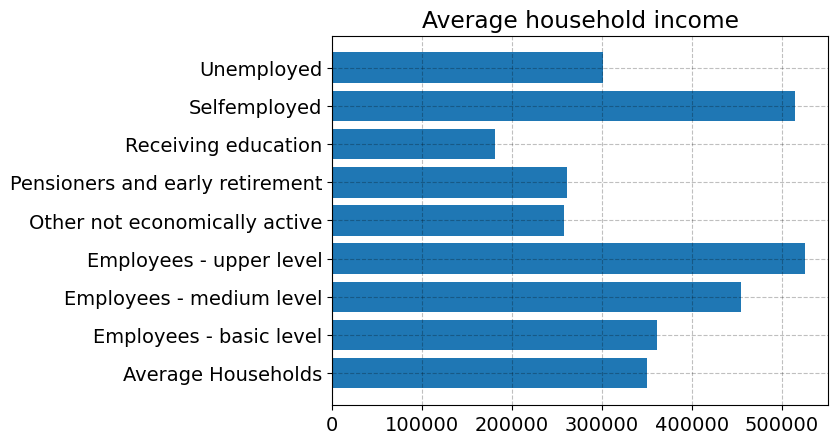

In [17]:
plt.barh(df["SOCIO"].values, df["INDHOLD"].values)
#plt.xticks(rotation=45)
plt.title("Average household income")

In [ ]:
df["SOCIO"].unique()

In [18]:
ind2 = DstApi('PRIS112')
tabsum2 = ind2.tablesummary(language='en')
display(tabsum2)

Table PRIS112: Consumer price index by main figures and time
Last update: 2023-01-10T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,HOVED,2,1005,"Average, yearly",1010,Annual increase,False
1,Tid,43,1980,1980,2022,2022,True


In [19]:
for variable in tabsum2['variable name']:
    print(variable+':')
    display(ind2.variable_levels(variable, language='en'))


HOVED:


,id,text
0,1005,"Average, yearly"
1,1010,Annual increase


Tid:


,id,text
0,1980,1980
1,1981,1981
2,1982,1982
3,1983,1983
4,1984,1984
5,1985,1985
6,1986,1986
7,1987,1987
8,1988,1988
9,1989,1989


In [20]:
params2 = ind2._define_base_params(language='en')
params2

{'table': 'pris112',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HOVED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [21]:
params2 = {'table': 'pris112',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HOVED', 'values': ['1010']},
  {'code': 'Tid', 'values': ['>2005<=2021']}]}

In [22]:
all_ind2 = ind2.get_data(params=params2)
all_ind2.head(5)

,HOVED,TID,INDHOLD
0,Annual increase,2006,1.9
1,Annual increase,2007,1.7
2,Annual increase,2008,3.4
3,Annual increase,2009,1.3
4,Annual increase,2010,2.3


In [23]:
all_ind2.sort_values(by=['HOVED','TID','HOVED'], inplace=True)
all_ind2.head(10)

,HOVED,TID,INDHOLD
0,Annual increase,2006,1.9
1,Annual increase,2007,1.7
2,Annual increase,2008,3.4
3,Annual increase,2009,1.3
4,Annual increase,2010,2.3
5,Annual increase,2011,2.8
6,Annual increase,2012,2.4
7,Annual increase,2013,0.8
8,Annual increase,2014,0.6
9,Annual increase,2015,0.5


In [24]:
all_ind2_sort = all_ind2.loc[:, ['TID', 'HOVED', 'INDHOLD']]
all_ind2_sort.head(30)

,TID,HOVED,INDHOLD
0,2006,Annual increase,1.9
1,2007,Annual increase,1.7
2,2008,Annual increase,3.4
3,2009,Annual increase,1.3
4,2010,Annual increase,2.3
5,2011,Annual increase,2.8
6,2012,Annual increase,2.4
7,2013,Annual increase,0.8
8,2014,Annual increase,0.6
9,2015,Annual increase,0.5


In [25]:
CPI = all_ind2_sort.HOVED.str.contains('Annual increase') # df med true, false values
CPI_table = all_ind2_sort.loc[CPI,['TID', 'HOVED', 'INDHOLD']]
CPI_table

,TID,HOVED,INDHOLD
0,2006,Annual increase,1.9
1,2007,Annual increase,1.7
2,2008,Annual increase,3.4
3,2009,Annual increase,1.3
4,2010,Annual increase,2.3
5,2011,Annual increase,2.8
6,2012,Annual increase,2.4
7,2013,Annual increase,0.8
8,2014,Annual increase,0.6
9,2015,Annual increase,0.5


In [26]:
df2 = CPI_table.copy()

In [27]:
df2.head()

,TID,HOVED,INDHOLD
0,2006,Annual increase,1.9
1,2007,Annual increase,1.7
2,2008,Annual increase,3.4
3,2009,Annual increase,1.3
4,2010,Annual increase,2.3


In [28]:
#Do an inner merge, so that we make sure, that we got data for all years and the years match up 
merge1 = pd.merge(df,df2, how='inner', on=['TID'])
merge1

,SOCIO,TID,KONSUMGRP,INDHOLD_x,HOVED,INDHOLD_y
0,Average Households,2006,CONSUMPTION TOTAL,344321,Annual increase,1.9
1,Employees - basic level,2006,CONSUMPTION TOTAL,361073,Annual increase,1.9
2,Employees - medium level,2006,CONSUMPTION TOTAL,428001,Annual increase,1.9
3,Employees - upper level,2006,CONSUMPTION TOTAL,525429,Annual increase,1.9
4,Other not economically active,2006,CONSUMPTION TOTAL,253911,Annual increase,1.9
...,...,...,...,...,...,...
139,Other not economically active,2021,CONSUMPTION TOTAL,211424,Annual increase,1.9
140,Pensioners and early retirement,2021,CONSUMPTION TOTAL,252906,Annual increase,1.9
141,Receiving education,2021,CONSUMPTION TOTAL,152169,Annual increase,1.9
142,Selfemployed,2021,CONSUMPTION TOTAL,361228,Annual increase,1.9


In [29]:
merge1.sort_values(by=['TID','HOVED','SOCIO','INDHOLD_x','INDHOLD_y'], inplace=True)
merge1.head(30)

,SOCIO,TID,KONSUMGRP,INDHOLD_x,HOVED,INDHOLD_y
0,Average Households,2006,CONSUMPTION TOTAL,344321,Annual increase,1.9
1,Employees - basic level,2006,CONSUMPTION TOTAL,361073,Annual increase,1.9
2,Employees - medium level,2006,CONSUMPTION TOTAL,428001,Annual increase,1.9
3,Employees - upper level,2006,CONSUMPTION TOTAL,525429,Annual increase,1.9
4,Other not economically active,2006,CONSUMPTION TOTAL,253911,Annual increase,1.9
5,Pensioners and early retirement,2006,CONSUMPTION TOTAL,241120,Annual increase,1.9
6,Receiving education,2006,CONSUMPTION TOTAL,181520,Annual increase,1.9
7,Selfemployed,2006,CONSUMPTION TOTAL,385725,Annual increase,1.9
8,Unemployed,2006,CONSUMPTION TOTAL,204257,Annual increase,1.9
9,Average Households,2007,CONSUMPTION TOTAL,350367,Annual increase,1.7


In [30]:
merge1_sort = merge1.loc[:, ['TID','HOVED','SOCIO','INDHOLD_x','INDHOLD_y']]
merge1_sort.head()

,TID,HOVED,SOCIO,INDHOLD_x,INDHOLD_y
0,2006,Annual increase,Average Households,344321,1.9
1,2006,Annual increase,Employees - basic level,361073,1.9
2,2006,Annual increase,Employees - medium level,428001,1.9
3,2006,Annual increase,Employees - upper level,525429,1.9
4,2006,Annual increase,Other not economically active,253911,1.9


In [39]:
def return_indhold_for_sociom(merge1_sort, socio):
    valuesm = merge1_sort[merge1_sort["SOCIO"] == socio]["INDHOLD_x"].values
    
    return valuesm


yearsm = np.arange(2006, 2022)

NameError: name 'line2' is not defined

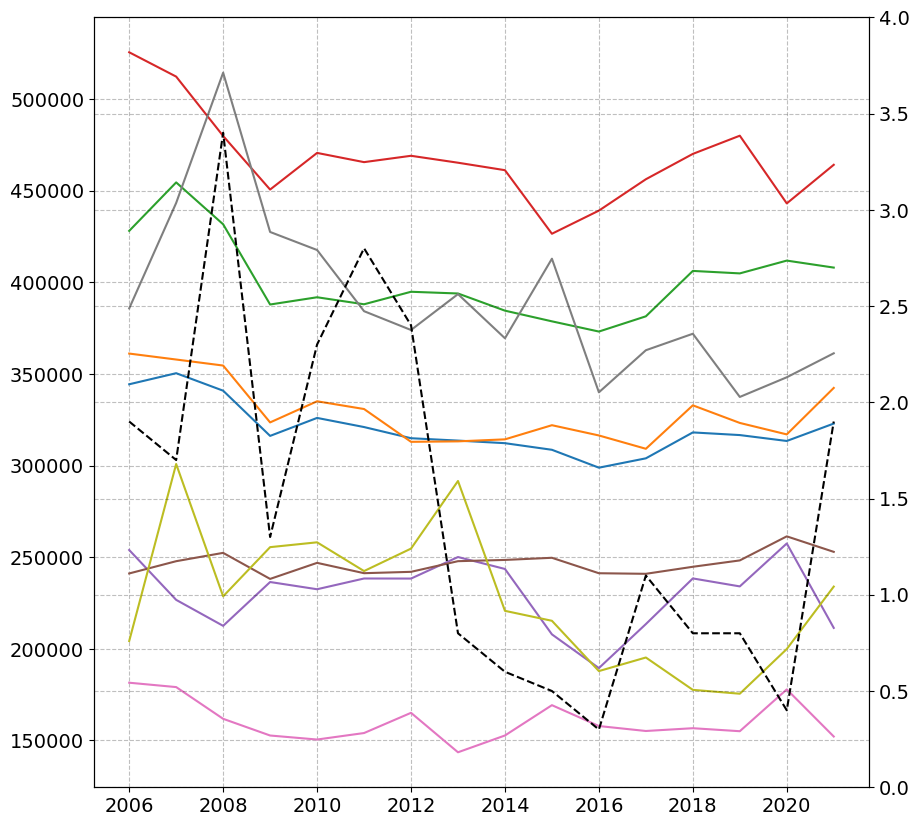

In [59]:
# Define the list of groups
groups = ['Average Households', 'Employees - basic level', 'Employees - medium level',
          'Employees - upper level', 'Other not economically active',
          'Pensioners and early retirement', 'Receiving education', 'Selfemployed',
          'Unemployed']

# Create a single plot with a line for each group
fig, ax1 = plt.subplots(figsize=(10,10))
for group in groups:
    values = return_indhold_for_sociom(merge1_sort, group)
    ax1.plot(years, values, label=group)

#CPIdata = merge1_sort['INDHOLD_y']
#CPIdata = merge1_sort.loc[merge1_sort['TID'].isin(yearsm), 'INDHOLD_y']
#CPIdata = merge1_sort.loc[merge1_sort['TID'].isin(years), 'INDHOLD_y']
#CPIdata = merge1_sort.groupby('TID')['INDHOLD_y'].mean()
CPIdata = pd.to_numeric(merge1_sort['INDHOLD_y'], errors='coerce').groupby(merge1_sort['TID']).mean()

ax2 = ax1.twinx()
ax2.plot(years, CPIdata, color='black', linestyle='--')
ax2.set_ylim(bottom=0.0, top=4)

#ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

lines1 = ax1.get_lines()
lines = lines1 + [line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1))


ax1.set_xlabel('Year')
ax1.set_ylabel('Socio group')
ax2.set_xlabel('Year')
ax2.set_ylabel('CPI')


# Show the plot
plt.show()


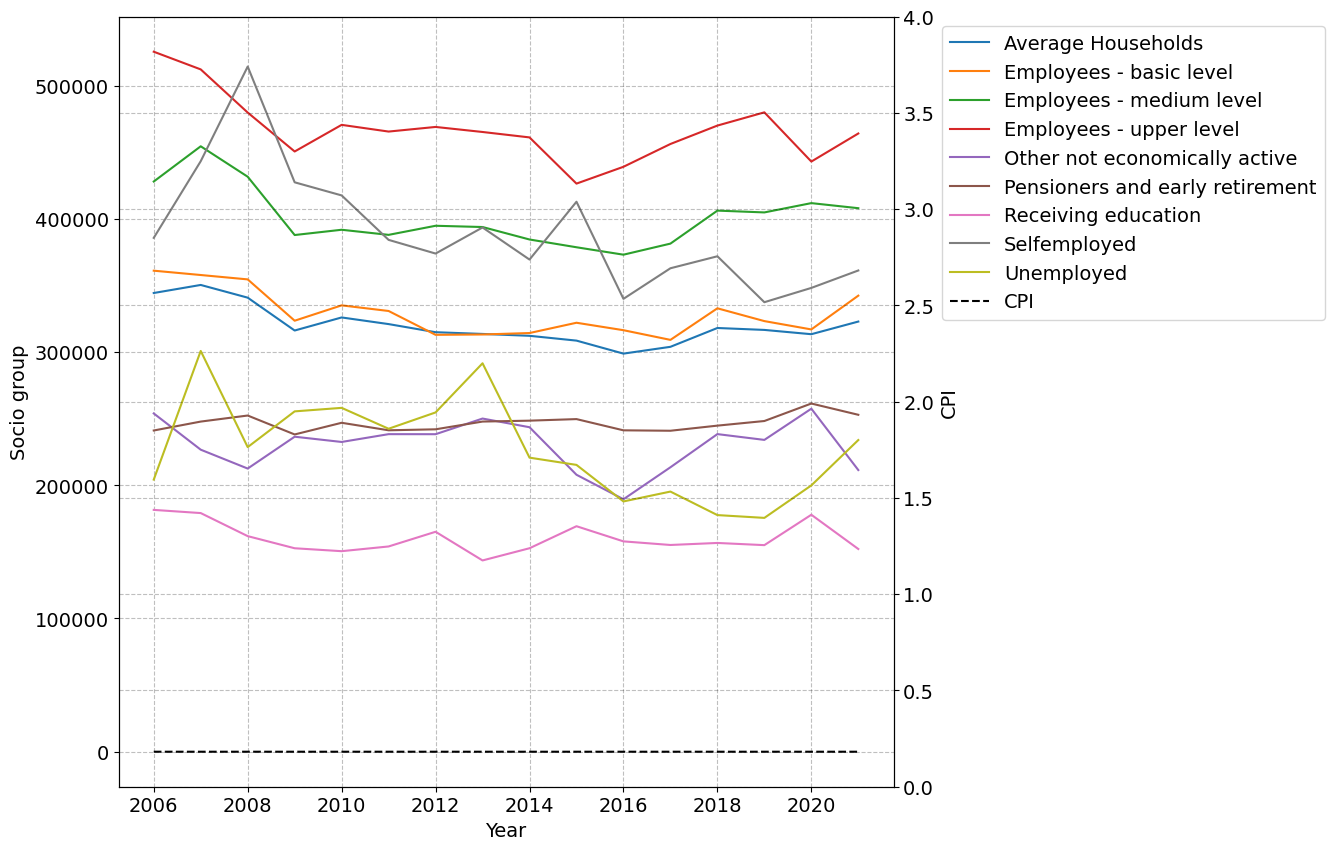

In [62]:
# Define the list of groups
groups = ['Average Households', 'Employees - basic level', 'Employees - medium level',          'Employees - upper level', 'Other not economically active',          'Pensioners and early retirement', 'Receiving education', 'Selfemployed',          'Unemployed']

# Create a single plot with a line for each group
fig, ax1 = plt.subplots(figsize=(10,10))
lines = []
for group in groups:
    values = return_indhold_for_sociom(merge1_sort, group)
    line, = ax1.plot(years, values, label=group)
    lines.append(line)

# Plot CPI data
CPIdata = pd.to_numeric(merge1_sort['INDHOLD_y'], errors='coerce').groupby(merge1_sort['TID']).mean()
line2, = ax1.plot(years, CPIdata, color='black', linestyle='--', label='CPI')
lines.append(line2)

# Set y limits for the second axis
ax2 = ax1.twinx()
ax2.set_ylim(bottom=0.0, top=4)

# Set the axis labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Socio group')
ax2.set_ylabel('CPI')

# Add a legend
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plot
plt.show()

/var/folders/7y/snczg3pd66s85jwr8746xgd00000gn/T/ipykernel_7129/112111378.py:29: UserWarning: The label '_child0' of <matplotlib.lines.Line2D object at 0x7f924bb3ef70> starts with '_'. It is thus excluded from the legend.
  plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1))


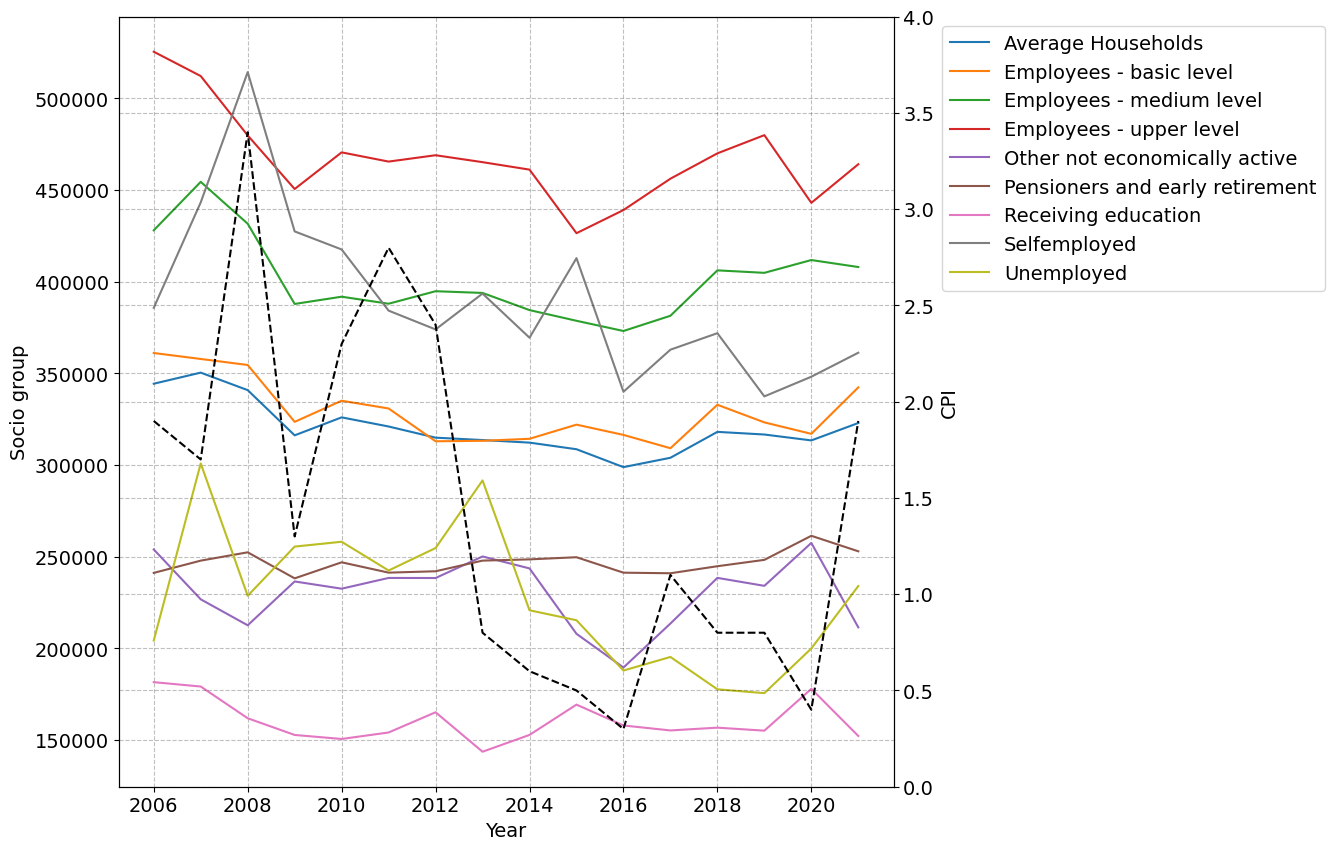

In [63]:
# Define the list of groups
groups = ['Average Households', 'Employees - basic level', 'Employees - medium level', 
          'Employees - upper level', 'Other not economically active', 
          'Pensioners and early retirement', 'Receiving education', 'Selfemployed', 
          'Unemployed']

# Create a single plot with a line for each group
fig, ax1 = plt.subplots(figsize=(10,10))
lines = []
for group in groups:
    values = return_indhold_for_sociom(merge1_sort, group)
    line, = ax1.plot(years, values, label=group)
    lines.append(line)

# Plot CPI data
CPIdata = pd.to_numeric(merge1_sort['INDHOLD_y'], errors='coerce').groupby(merge1_sort['TID']).mean()
ax2 = ax1.twinx()
ax2.plot(years, CPIdata, color='black', linestyle='--')
ax2.set_ylim(bottom=0.0, top=4)
ax2.set_ylabel('CPI')
lines.append(ax2.lines[0])

# Set the axis labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Socio group')

# Add a legend
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plot
plt.show()

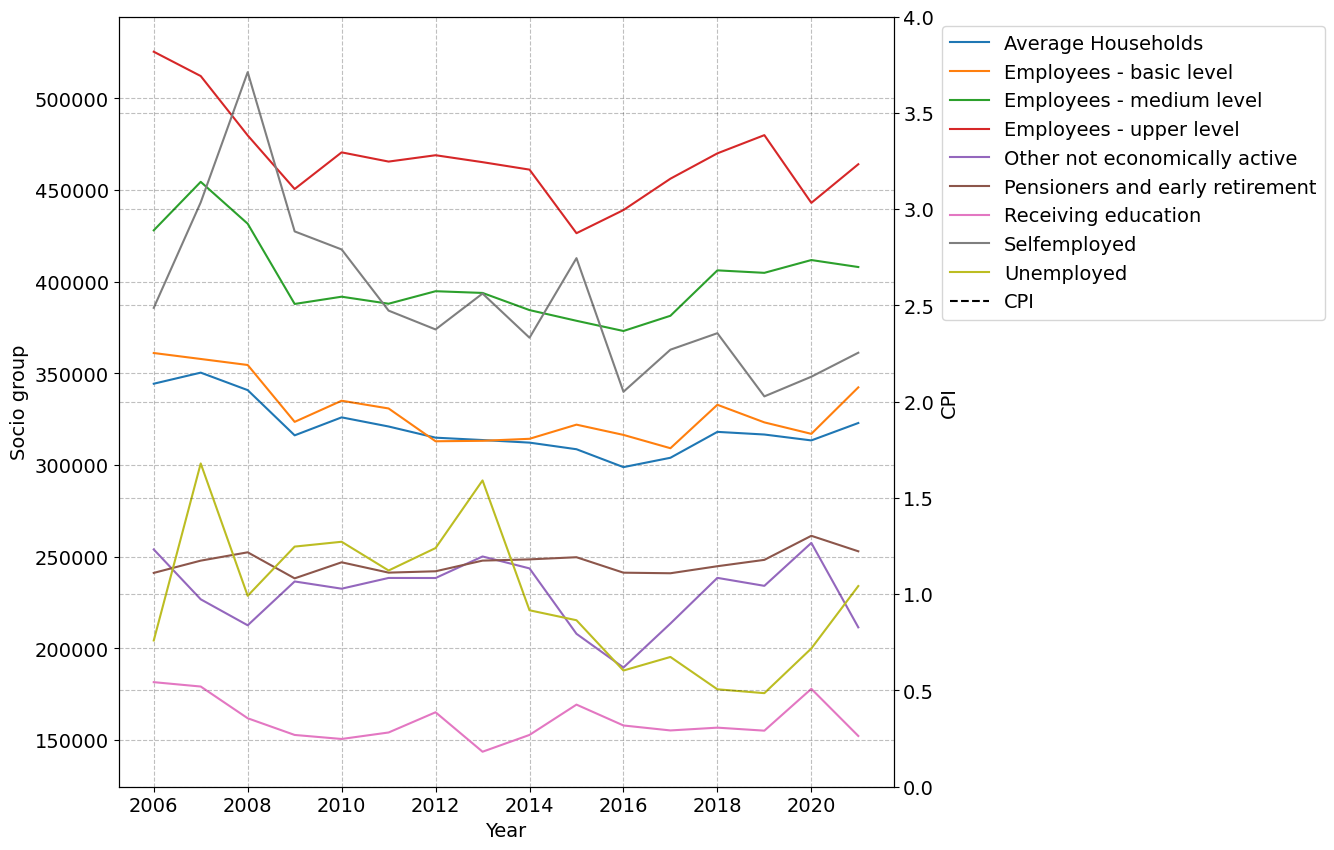

In [67]:
# Define the list of groups
groups = ['Average Households', 'Employees - basic level', 'Employees - medium level',          'Employees - upper level', 'Other not economically active',          'Pensioners and early retirement', 'Receiving education', 'Selfemployed',          'Unemployed']

# Create a single plot with a line for each group
fig, ax1 = plt.subplots(figsize=(10,10))
lines = []
for group in groups:
    values = return_indhold_for_sociom(merge1_sort, group)
    line, = ax1.plot(years, values, label=group)
    lines.append(line)

# Plot CPI data
CPIdata = pd.to_numeric(merge1_sort['INDHOLD_y'], errors='coerce').groupby(merge1_sort['TID']).mean()
line2, = ax2.plot(years, CPIdata, color='black', linestyle='--', label='CPI')
lines.append(line2)

# Set y limits for the second axis
ax2 = ax1.twinx()
ax2.set_ylim(bottom=0.0, top=4)

# Set the axis labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Socio group')
ax2.set_ylabel('CPI')

# Add a legend
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plot
plt.show() 

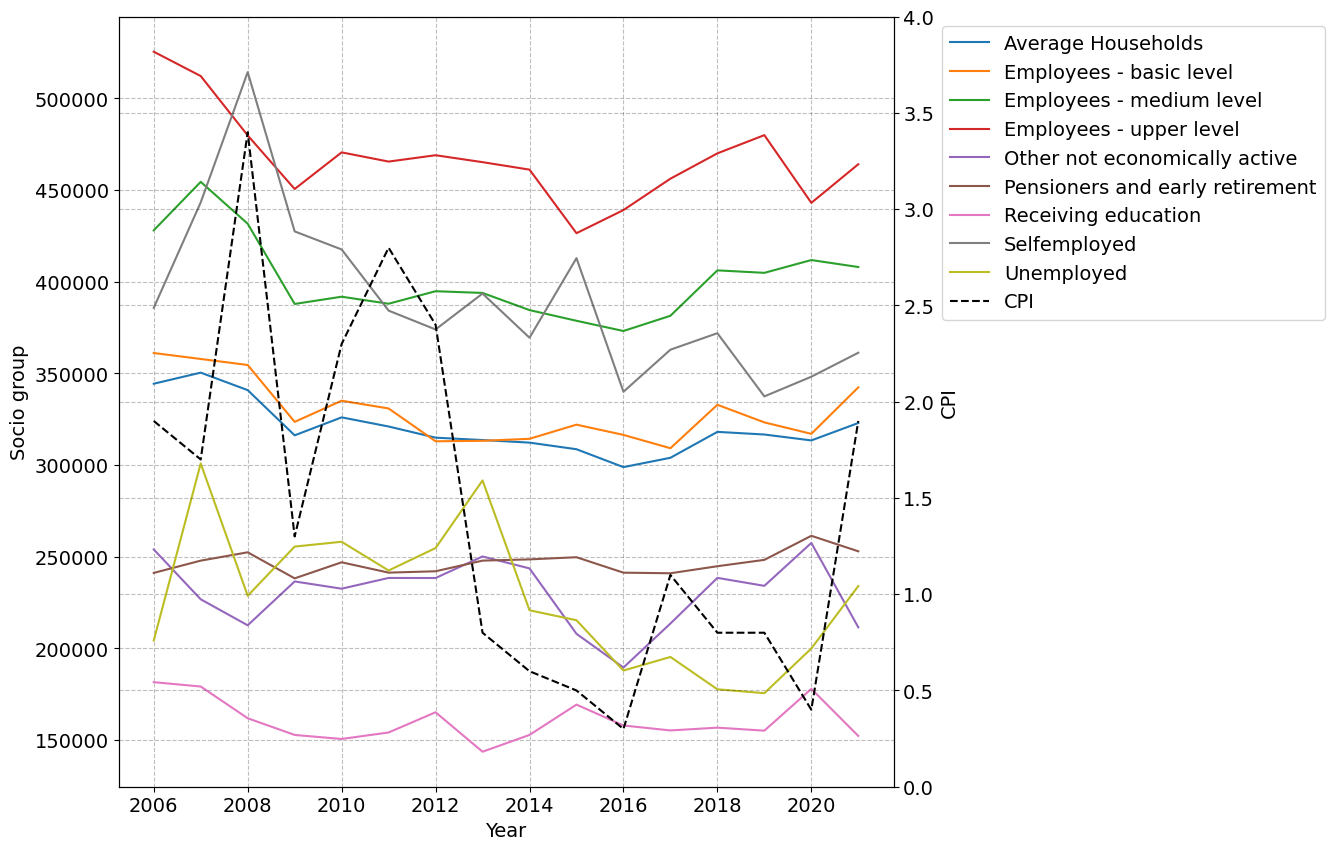

In [69]:
# Define the list of groups
groups = ['Average Households', 'Employees - basic level', 'Employees - medium level',                    'Employees - upper level', 'Other not economically active',                    'Pensioners and early retirement', 'Receiving education', 'Selfemployed',                    'Unemployed']

# Create a single plot with a line for each group
fig, ax1 = plt.subplots(figsize=(10,10))
lines = []
for group in groups:
    values = return_indhold_for_sociom(merge1_sort, group)
    line, = ax1.plot(years, values, label=group)
    lines.append(line)

# Plot CPI data
CPIdata = pd.to_numeric(merge1_sort['INDHOLD_y'], errors='coerce').groupby(merge1_sort['TID']).mean()
ax2 = ax1.twinx()
ax2.plot(years, CPIdata, color='black', linestyle='--')
ax2.set_ylim(bottom=0.0, top=4)
ax2.set_ylabel('CPI')

# Set the axis labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Socio group')

# Add a legend
lines = lines1 + [line2]
labels = [line.get_label() for line in lines1]
labels.append(line2.get_label())
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1))
# Show the plot
plt.show() 
